In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, SpatialDropout1D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Internship\New\IMDB Dataset.csv\IMDB Dataset.csv")

In [5]:
import random
import tensorflow as tf

In [6]:
random.seed(45)
np.random.seed(45)
tf.random.set_seed(45)

In [7]:
MAX_NB_WORDS = 50000  
MAX_SEQUENCE_LENGTH = 250 
EMBEDDING_DIM = 32  
epochs = 50  
batch_size = 64 

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
import keras

In [8]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 124306 unique tokens.


In [9]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 124306 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(df['review'].values) 
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) 
print('Shape of data tensor:', X.shape) 
Y = df["sentiment"]
enc = OneHotEncoder(handle_unknown='ignore') 
Y = enc.fit_transform(Y.values.reshape(-1,1)).toarray() 

Shape of data tensor: (50000, 250)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42) 
print(X_train.shape,Y_train.shape) 

(35000, 250) (35000, 2)


In [19]:
print(X_test.shape,Y_test.shape) 

(15000, 250) (15000, 2)


In [20]:
epochs = 20 #10-87% 
batch_size = 64

In [21]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, mask_zero=True), 
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,  return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(2) 
])

In [22]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy']) 

In [23]:
history1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/20
547/547 [==============================] - 204s 340ms/step - loss: 0.6160 - accuracy: 0.6376 - val_loss: 0.3588 - val_accuracy: 0.8483
Epoch 2/20
547/547 [==============================] - 308s 563ms/step - loss: 0.2879 - accuracy: 0.8894 - val_loss: 0.2627 - val_accuracy: 0.8917
Epoch 3/20
547/547 [==============================] - 148s 269ms/step - loss: 0.1894 - accuracy: 0.9354 - val_loss: 0.2548 - val_accuracy: 0.8965
Epoch 4/20
547/547 [==============================] - 125s 228ms/step - loss: 0.1317 - accuracy: 0.9581 - val_loss: 0.2772 - val_accuracy: 0.8943
Epoch 5/20
547/547 [==============================] - 133s 243ms/step - loss: 0.0933 - accuracy: 0.9736 - val_loss: 0.3433 - val_accuracy: 0.8909
Epoch 6/20
547/547 [==============================] - 233s 426ms/step - loss: 0.0648 - accuracy: 0.9831 - val_loss: 0.4122 - val_accuracy: 0.8854


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          1600000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         37632     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [25]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)


469/469 [==============================] - 23s 44ms/step
[[ 2.9135034 -2.8322127]
 [-2.3737288  2.4154058]
 [ 4.114135  -4.1322517]
 ...
 [ 3.031895  -2.9348848]
 [-6.1956387  6.0792985]
 [-3.9399495  3.852325 ]]
[0 1 0 ... 0 1 1]


In [26]:
print(Y_test)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [27]:
Y_test_labels = np.argmax(Y_test, axis=1)

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7411
           1       0.89      0.90      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



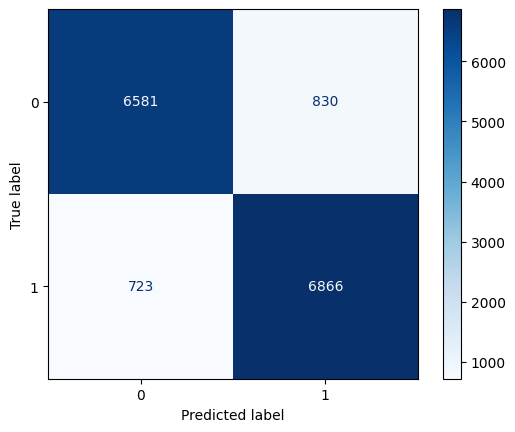

In [29]:
print(classification_report(Y_test_labels,y_pred_labels))
cm = confusion_matrix(Y_test_labels,y_pred_labels, labels=[0, 1 ])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()